In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

df=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\New folder (3)\regression_datasets_large.xlsx - Movie_Revenue.csv")

# Train model inside Streamlit app
X = df[["Marketing_Spend_Cr"]]
y = df["Box_Office_Revenue_Cr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

Intercept (b0): 106.14538392220001
Slope (b1): 8.60725220793997


In [12]:
predicted_revenue = model.predict([[10]])
print(predicted_revenue)

[192.217906]


In [13]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(mae)
print(mse)

48.16594032854619
3124.515221539548


In [14]:
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: -0.06576100208407998


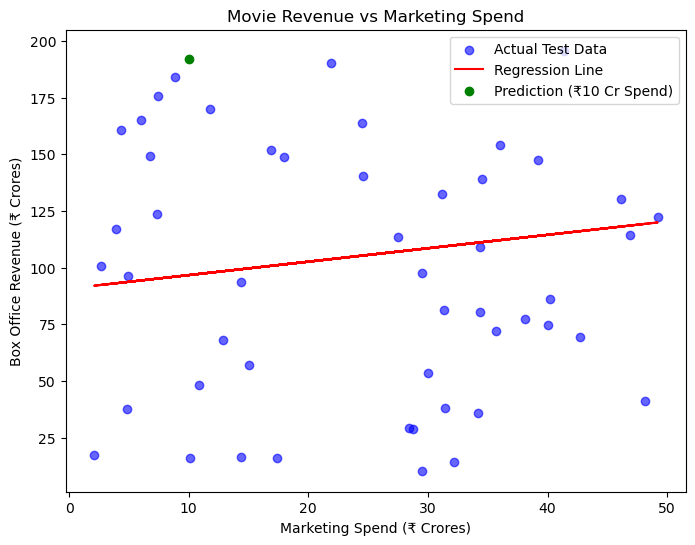

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Actual Test Data")
plt.plot(X_test, model.predict(X_test_scaled), color="red", label="Regression Line")
plt.scatter([10], [predicted_revenue], color="green", label="Prediction (₹10 Cr Spend)")
plt.xlabel("Marketing Spend (₹ Crores)")
plt.ylabel("Box Office Revenue (₹ Crores)")
plt.title("Movie Revenue vs Marketing Spend")
plt.legend()
plt.show()


In [16]:
print(len(y_test), len(y_pred))

50 50


In [17]:
import pickle
filename = 'movie_model.sav'

with open("movie_model.sav", "wb") as f:
    pickle.dump((model, scaler), f)
with open("movie_model.sav", "rb") as f:
    model, scaler = pickle.load(f)
